<h2 style='color:blue' align='center'>10 classes of food Classification Using Convolutional Neural Network (CNN)</h2>

<img src="small_images.jpg" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import os

<h2 style="color:purple">Load the dataset</h2>

In [1]:
import splitfolders
import os
path = r"E:\intern_projects\archive(17)\images2"
print(os.listdir(path))
len(os.listdir(path))

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


10

In [11]:
from PIL import Image

# Path to the image file
image_path = r"C:\Users\Lenovo\Downloads\intern_projects\archive(17)\food-Splitted\test\breakfast_burrito\902088.jpg"

# Open the image file
with Image.open(image_path) as img:
    # Get the image shape (width, height)
    image_shape = img.size
    # Get the image mode (e.g., RGB, grayscale)
    image_mode = img.mode

# Print the image shape and mode
print("Image shape:", image_shape)
print("Image mode:", image_mode)


Image shape: (512, 512)
Image mode: RGB


In [3]:
splitfolders.ratio(path,seed=1337, output="food-Splitted", ratio=(0.9, 0.05, 0.05))

Copying files: 10000 files [00:20, 486.44 files/s]


In [2]:
BATCH_SIZE = 32
DATA_DIRT = (r"C:\Users\Lenovo\Downloads\intern_projects\archive(17)\food-Splitted\train")
DATA_DIRTE = (r"C:\Users\Lenovo\Downloads\intern_projects\archive(17)\food-Splitted\test")
DATA_DIRV = (r"C:\Users\Lenovo\Downloads\intern_projects\archive(17)\food-Splitted\val")
IMG_SIZE = 256
MAX_EPOCHS = 25
class_names = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
class_details = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators with augmentation for train set and rescaling only for validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


# Define batch size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    DATA_DIRT,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    DATA_DIRV,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    DATA_DIRTE,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')


Found 9000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [3]:
# Cache and prefetch data for faster training
AUTOTUNE = tf.data.AUTOTUNE


def compile_and_fit_model(model: tf.keras.Sequential) -> tf.keras.callbacks.History:
    
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy", 
        metrics=["accuracy"]
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-4,
        patience=10,
        mode="auto",
        restore_best_weights=True
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=5,
        min_lr=0.001
    )
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=100,
        callbacks=[early_stopping, reduce_lr]
    )
    performance_df = pd.DataFrame(history.history)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for ax, metric in zip(axes.flat, ["accuracy", "loss"]):
        performance_df.filter(like=metric).plot(ax=ax)
        ax.set_title(metric.title(), size=15, pad=20)
    return history


def plot_predictions(model: tf.keras.Sequential) -> None:
    plt.figure(figsize=(14, 14))
    for images, labels in train_ds.take(1):
        labels = labels.numpy()
        predicted_labels = np.argmax(model.predict(images), axis=1)
        for i, (actual, pred) in enumerate(zip(predicted_labels, labels)):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            if actual == pred:
                plt.title(class_details[labels[i]], color="green", size=9)
            else:
                plt.title(f"{class_details[predicted_labels[i]]}\n"
                          + f"(Actual: {class_details[labels[i]]})",
                          color="red", size=9)
            plt.axis("off")

In [4]:
# Define the model
model = tf.keras.Sequential([
    layers.Input(shape=(499, 375, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
model.summary()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 497, 373, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 248, 186, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 246, 184, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 92, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 90, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 345600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   176,947,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,046,090 (675.38 MB)

 Trainable params: 177,046,090 (675.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


282/282 ━━━━━━━━━━━━━━━━━━━━ 640s 2s/step - accuracy: 0.1459 - loss: 3.7451 - val_accuracy: 0.2300 - val_loss: 2.1372 - learning_rate: 0.0010
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 0.2672 - loss: 2.0178 - val_accuracy: 0.3420 - val_loss: 1.8737 - learning_rate: 0.0010
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 0.3331 - loss: 1.8409 - val_accuracy: 0.3780 - val_loss: 1.8605 - learning_rate: 0.0010
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.3608 - loss: 1.7586 - val_accuracy: 0.4180 - val_loss: 1.7253 - learning_rate: 0.0010
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 701s 2s/step - accuracy: 0.4190 - loss: 1.6371 - val_accuracy: 0.4620 - val_loss: 1.6090 - learning_rate: 0.0010
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.4445 - loss: 1.6023 - val_accuracy: 0.4500 - val_loss: 1.6000 - learning_rate: 0.0010
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.4698 - loss: 1.5404 

282/282 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.6368 - loss: 1.0595 - val_accuracy: 0.5320 - val_loss: 1.4720 - learning_rate: 0.0010
Epoch 45/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 659s 2s/step - accuracy: 0.6351 - loss: 1.0256 - val_accuracy: 0.5980 - val_loss: 1.2271 - learning_rate: 0.0010


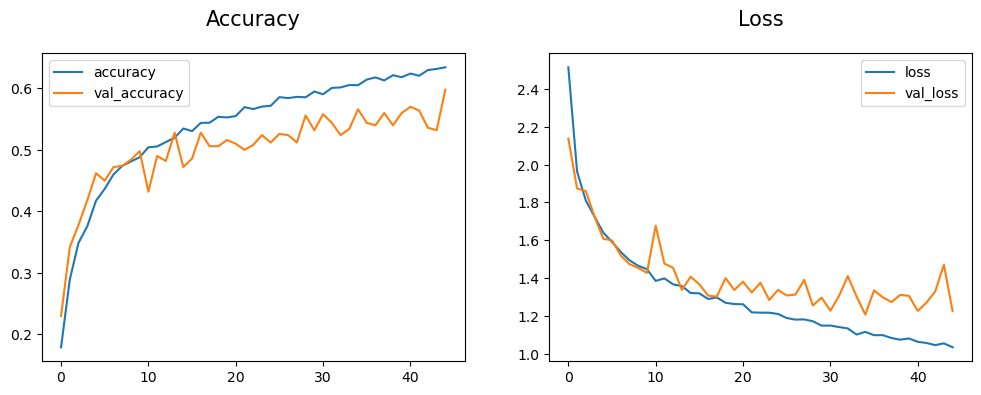

In [5]:
cnn_model = compile_and_fit_model(model)

## DenseNet201

In [6]:
pretrained_DenseNet201_base=tf.keras.applications.densenet.DenseNet201(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_DenseNet201_base.trainable = False


DenseNet201_modell = tf.keras.Sequential([
    layers.Input(shape=(265, 265, 3)),
    layers.Lambda(tf.keras.applications.densenet.preprocess_input),
    pretrained_DenseNet201_base,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")

])
DenseNet201_modell.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 265, 265, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 1920)           │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       983,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,573,322 (74.67 MB)

 Trainable params: 1,251,338 (4.77 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [7]:
DenseNet201_history = compile_and_fit_model(DenseNet201_modell)

Epoch 1/100


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 57/282 ━━━━━━━━━━━━━━━━━━━━ 22:19 6s/step - accuracy: 0.0997 - loss: 2.3841

KeyboardInterrupt: 

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.3067 - loss: 1.9425
Test Accuracy: 0.29600000381469727
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step
Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.14      0.12      0.13        50
   baby_back_ribs       0.07      0.06      0.07        50
          baklava       0.14      0.18      0.16        50
   beef_carpaccio       0.04      0.04      0.04        50
     beef_tartare       0.16      0.14      0.15        50
       beet_salad       0.05      0.06      0.05        50
         beignets       0.11      0.16      0.13        50
         bibimbap       0.10      0.14      0.12        50
    bread_pudding       0.06      0.02      0.03        50
breakfast_burrito       0.04      0.02      0.03        50

         accuracy                           0.09       500
        macro avg       0.09      0.09      0.09       500
     weighted avg       0.09      0.09      0.09       500

C

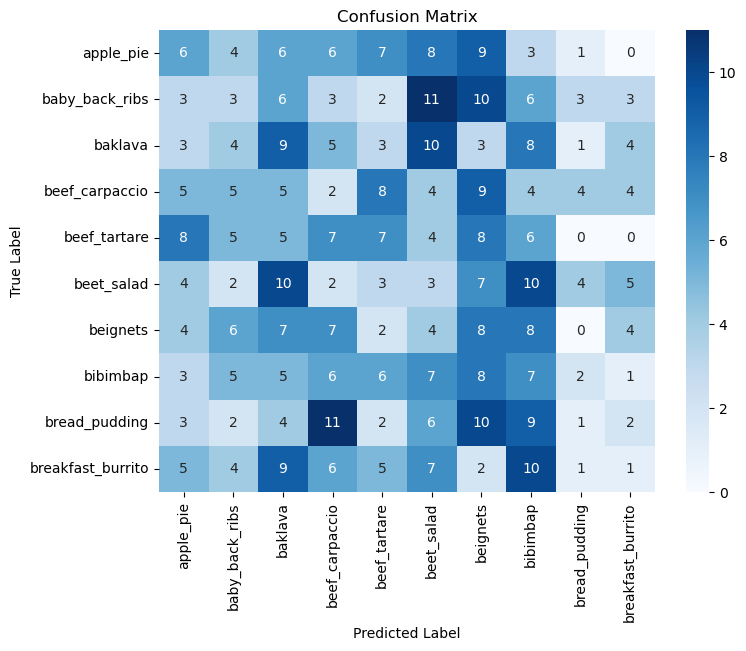

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as mt

# Evaluate the model using generator
test_loss, test_accuracy = DenseNet201_modell.evaluate(test_generator)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

# Predict labels for test set using generator
y_pred = DenseNet201_modell.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the generator
y_true = test_generator.classes

# Generate classification report
print("Classification Report:")
print(mt.classification_report(y_true, y_pred_classes, target_names=class_names))

# Generate confusion matrix
conf_mat = mt.confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## efficientnet_v2

In [13]:
pretrained_efficientnet_v2_base=tf.keras.applications.efficientnet_v2.EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_efficientnet_v2_base.trainable = False

efficientnet_v2_modell = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Lambda(tf.keras.applications.efficientnet_v2.preprocess_input),
    pretrained_efficientnet_v2_base,
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")
])
efficientnet_v2_modell.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,780,330 (83.09 MB)

 Trainable params: 1,448,970 (5.53 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [14]:
efficientnet_v2_history = compile_and_fit_model(efficientnet_v2_modell)

Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 995s 3s/step - accuracy: 0.1281 - loss: 2.2991 - val_accuracy: 0.1580 - val_loss: 2.2142 - learning_rate: 0.0010
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 972s 3s/step - accuracy: 0.1410 - loss: 2.2483 - val_accuracy: 0.1440 - val_loss: 2.2181 - learning_rate: 0.0010
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 968s 3s/step - accuracy: 0.1384 - loss: 2.2405 - val_accuracy: 0.1660 - val_loss: 2.2281 - learning_rate: 0.0010
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 964s 3s/step - accuracy: 0.1510 - loss: 2.2333 - val_accuracy: 0.1660 - val_loss: 2.1840 - learning_rate: 0.0010
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 981s 3s/step - accuracy: 0.1625 - loss: 2.2381 - val_accuracy: 0.1740 - val_loss: 2.1924 - learning_rate: 0.0010
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 983s 3s/step - accuracy: 0.1492 - loss: 2.2372 - val_accuracy: 0.1760 - val_loss: 2.1948 - learning_rate: 0.0010
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 976s 3s/step - accuracy: 0.1589 - l

KeyboardInterrupt: 

In [ ]:
score =efficientnet_v2_modell.evaluate(testing_ds, steps = len(testing_ds)/BATCH_SIZE, verbose = 0)
print('test loss:', score[0])
print('test accuracy:', score[1])

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Define constants
IMG_SIZE = 256
BATCH_SIZE = 32
DATA_DIRT = r"C:\Users\Lenovo\Downloads\uni_projects\omar_elkilany_project\leap-Splitted\train"
class_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

# Define data generator
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
train_generator = train_datagen.flow_from_directory(
    DATA_DIRT,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load pre-trained feature extractor model
pretrained_efficientnet_v2_base = tf.keras.applications.EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_efficientnet_v2_base.trainable = False

# Define the SVM model
svm_model = make_pipeline(
    StandardScaler(),  # Normalize features
    SVC(kernel='linear', C=1.0)  # Linear SVM classifier
)

# Function to extract features from images
def extract_features(images):
    images = tf.image.resize(images, (IMG_SIZE, IMG_SIZE))  # Resize images
    features = pretrained_efficientnet_v2_base.predict(images)
    return features

# Extract features from training data
train_features = []
train_labels = []
for images, labels in train_generator:
    features = extract_features(images)
    train_features.append(features)
    train_labels.append(labels)
    if len(train_features) * BATCH_SIZE >= len(train_generator.filenames):
        break

train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

# Convert one-hot encoded labels to 1D array
train_labels_indices = np.argmax(train_labels, axis=1)

# Train SVM model
svm_model.fit(train_features, train_labels_indices)


Found 1800 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 92

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Define data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_generator = test_datagen.flow_from_directory(
    DATA_DIRTE,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for consistent evaluation
)

# Extract features and labels from test data
test_features = []
test_labels = []
for images, labels in test_generator:
    features = extract_features(images)
    test_features.append(features)
    test_labels.append(labels)
    if len(test_features) * BATCH_SIZE >= len(test_generator.filenames):
        break

test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)
test_labels_indices = np.argmax(test_labels, axis=1)

# Predict labels for test data
predicted_labels_indices = svm_model.predict(test_features)

# Compute accuracy
accuracy = accuracy_score(test_labels_indices, predicted_labels_indices)
print("Test Accuracy:", accuracy)

# Generate classification report
class_names = [class_names[i] for i in range(len(class_names))]
report = classification_report(test_labels_indices, predicted_labels_indices, target_names=class_names)
print("Classification Report:")
print(report)


Found 500 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
Test Accuracy: 0.078
Classification Report:
               precision    recall  f1-score   support

      01_palm       0.09      0.28      0.13        50
         02_l       0.04      0.02      0.03        50
      03_fist       0.06      0.30      0.10        50
04_fist_moved       0.00      0.00      0.00        50
     05_thumb 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
pretrained_resnet50_base=tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_resnet50_base.trainable = False


resnet50_modell = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Lambda(tf.keras.applications.resnet50.preprocess_input),
    pretrained_resnet50_base,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
])
resnet50_modell.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,904,586 (95.00 MB)

 Trainable params: 1,316,874 (5.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
resnet50_history = compile_and_fit_model(resnet50_modell)

Epoch 1/100
253/282 ━━━━━━━━━━━━━━━━━━━━ 1:56 4s/step - accuracy: 0.1054 - loss: 2.4592

KeyboardInterrupt: 